# Statistical Analysis of Fast Food Marketing Campaigns

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Data Wrangling](#data-wrangling)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Formatting](#formatting)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [ANOVA Test](#anova-test)
    - [Testing Method Background Info](#testing-method-background-info)
    - [Assumption Check](#assumption-check)
    - [Statistical Testing](#statistical-testing)
- [Conclusions](#conclusions)
- [Dataset Citation](#dataset-citation)

## Project Introduction

A rapidly growing fast-food chain is preparing to launch a new menu item and is evaluating three potential marketing campaigns to promote it. To determine the most effective strategy, the menu item will be introduced at several randomly selected locations, with each location randomly assigned one of the three campaigns. Weekly sales will be recorded over a four-week period.

Hypothesis:

- Null hypothesis (H0): There is no significant difference in weekly sales among the three marketing campaigns.

- Alternative hypothesis (H1): At least one marketing campaign results in significantly different weekly sales compared to the others.


This study aims to identify the marketing campaign that maximizes sales performance and informs strategic decision-making for the new menu launch.

### Analysis Outline

- Exploratory Data Analysis performed to get a quick general view of the data

- Conducted a Shapiro-Wilk test to check if the data for normality. This test resulted in the significance level being less than 0.05, indicating that one the assumptions is not met and that it is not a normal distribution

- Additionally, conducted a Levene test to check for equal variances between promotion groups. This resulted in the p-value being greater than 0.05 and does not violate variance of homogenity telling me the variances are equal across all promotion groups

- In the case of non-normal distribution, we used the Kruskal–Wallis Test a non-parametric test. The p-value resulted being less than 0.05 giving reason to reject the null hypothesis showing there is a significant statistical difference in at least one of the promotion groups

- After discovering there is at least one statistical difference in the promotion groups  compare the mean sales of each promotion group using Tukey’s Honestly Significant Difference test which tells me that promotion group 2 is the optimal promotion group to maximize sales

### Results

Based on the analysis, a statistically significant difference was observed among the marketing groups, providing sufficient evidence to reject the null hypothesis. Of the three marketing campaigns evaluated, promotion group 2 appears to be the most effective for maximizing sales.

[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, levene, kruskal
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Importing dataset
try:
    df = pd.read_csv('wa_marketing_campaign.csv')
except:
    df = pd.read_csv('/datasets/wa_marketing_campaign.csv')

[Back to Table of Contents](#back)

## Data Wrangling

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


### Duplicates

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [5]:
# Checking for null values
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

[Back to Table of Contents](#back)

### Formatting

In [6]:
# Checking for snakecase format
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

In [7]:
# Renaming column names to snake_case format
df = df.rename(columns={'MarketID': 'market_id',
                        'MarketSize': 'market_size',
                        'LocationID': 'location_id',
                        'AgeOfStore': 'store_age',
                        'Promotion': 'promotion_group',
                        'SalesInThousands': 'sales_in_thousands'})
df.columns

Index(['market_id', 'market_size', 'location_id', 'store_age',
       'promotion_group', 'week', 'sales_in_thousands'],
      dtype='object')

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.lower()
        df[column] = df[column].str.strip()
        df[column] = df[column].str.rstrip()
        df[column] = df[column].str.replace(' ', '_')
        df[column] = df[column].str.replace('[^a-z0-9_]', '')

df.head(5)

,market_id,market_size,location_id,store_age,promotion_group,week,sales_in_thousands
0,1,medium,1,4,3,1,33.73
1,1,medium,1,4,3,2,35.67
2,1,medium,1,4,3,3,29.03
3,1,medium,1,4,3,4,39.25
4,1,medium,2,5,2,1,27.81


[Back to Table of Contents](#back)

## Exploratory Data Analysis

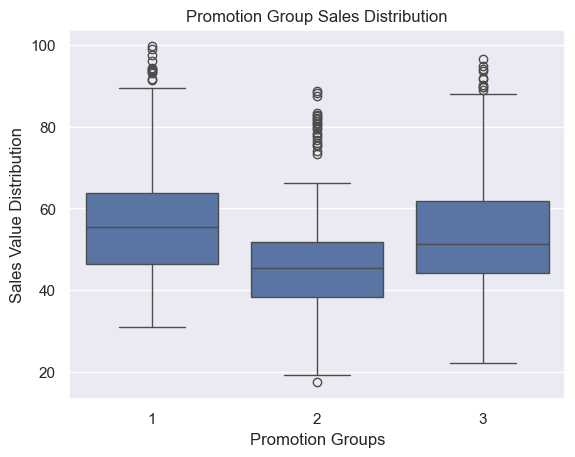

In [9]:
# Setting theme
sns.set_theme(style='darkgrid')

# Looking at the sales distribution
sns.boxplot(data=df,
            x='promotion_group',
            y='sales_in_thousands')
plt.title('Promotion Group Sales Distribution')
plt.xlabel('Promotion Groups')
plt.ylabel('Sales Value Distribution')
plt.show()

Observation:

- Based on the data, the promotion group 2 has a lower sales median and range than groups 1 and 3

- Additionally, there are several outliers on the higher end for each of the promotion groups leading me to believe that they are not normally distributed

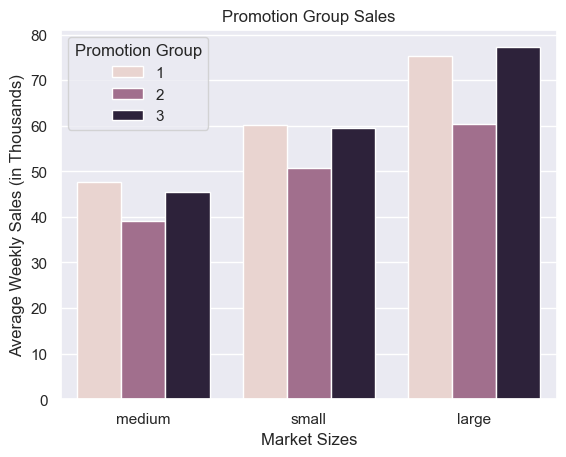

In [10]:
# Looking at the the sales from the different market sizes and promotion groups
sns.barplot(data=df,
            x='market_size',
            y='sales_in_thousands',
            hue='promotion_group',
            errorbar=None)
plt.title('Promotion Group Sales')
plt.xlabel('Market Sizes')
plt.ylabel('Average Weekly Sales (in Thousands)')
plt.legend(title='Promotion Group')
plt.show()

Observation:

- The average revenue generated from each market size is similar to each other across all market sizes

-  Promotion 2 is the lowest-performing marketing campaign across all market sizes

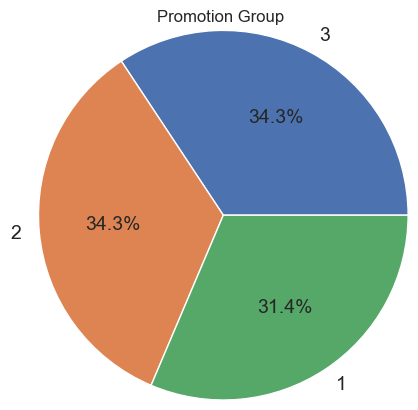

In [11]:
# Looking for the promotion group distribution
df['promotion_group'].value_counts().plot(kind='pie',
                                          autopct='%1.1f%%',
                                          fontsize=14,
                                          radius=1.25)
plt.title('Promotion Group ',
          loc='center')
plt.ylabel('')
plt.show()

Observation:

- Promotion group 1 is about 3% lower than either promotion group 2 or 3 but overall about equal

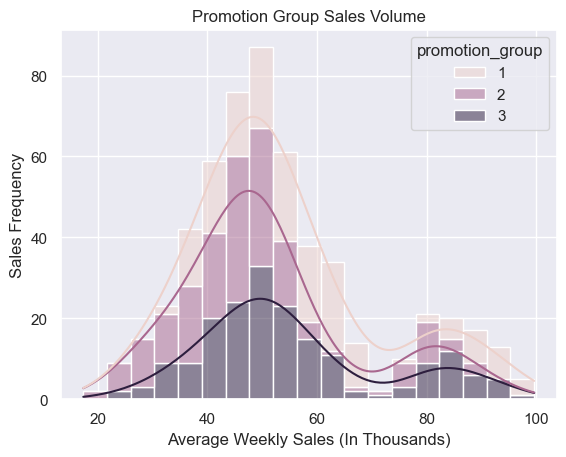

In [12]:
# Uncovering the sales frequency for each promotion group
sns.histplot(data=df,
             x='sales_in_thousands',
             hue='promotion_group',
             multiple='stack',
             kde=True)
plt.title('Promotion Group Sales Volume')
plt.xlabel('Average Weekly Sales (In Thousands)')
plt.ylabel('Sales Frequency')
plt.show()

Observation:

- This graphically shows that the data is not normally distributed and would possibly need to use a non-parametric test

[Back to Table of Contents](#back)

## ANOVA Test

### Testing Method Background Info:

We will use Analysis of Variance (ANOVA) to compare multiple promotion groups (3 or more). ANOVA relies on two key assumptions:

1)	Normality – each group should follow a normal distribution.

2)	Homogeneity of variance – groups should have equal variances.

For this analysis, we set the significance level (α) at 0.05, meaning there is a 5% chance of making a Type I error (incorrectly rejecting a true null hypothesis).

- Null hypothesis (H0): There is no significant difference in weekly sales among the three marketing campaigns.

- Alternative hypothesis (H1): At least one marketing campaign results in significantly different weekly sales compared to the others.

Depending on if both of these assumptions hold, we adjust our testing approach:

- If normality is met, we can then check homogeneity of variance.

- If both assumptions are met then we can continue to the ANOVA test

- If one of the two requirements are not met, we use a non-parametric alternative such as the Kruskal-Wallis test.

- If there is a difference in the promotion groups we can use Tukey’s Honestly Significant Difference test to find which group is the optimal group

### Assumption Check

In [13]:
# To test for the normality assumption, I will use the Shapiro-Wilk test to test normality of distribution
for group in list(df['promotion_group'].unique()):
    p_value = shapiro(df.loc[df['promotion_group'] == group, 'sales_in_thousands'])[1]
    print(f'Promotion Group: {group}, p-value: {p_value:.3f}')

Promotion Group: 3, p-value: 0.000
Promotion Group: 2, p-value: 0.000
Promotion Group: 1, p-value: 0.000


Observation:

- Since the p-value < 0.05 we have reason to reject the null hypothesis which indicates this is not a normal distribution 

- In cases of a non-normal distribution, we can then use a non-parametric test like the Kruskal–Wallis Test 

In [14]:
# Since one assumption has already failed, we are committed to using a non-parametric test. 
# However, checking for equal variances would be interesting to get more info from the data
test_stat, p_value = levene(df.loc[df['promotion_group'] == 1, 'sales_in_thousands'],
                            df.loc[df['promotion_group'] == 2, 'sales_in_thousands'],
                            df.loc[df['promotion_group'] == 3, 'sales_in_thousands'])
print(f'Test Stat: {test_stat:.3f} \np-value: {p_value:.3f}')

Test Stat: 1.270 
p-value: 0.282


Observation:

- For the Levene test the p-value is > 0.05 and does not violate variance of homogenity telling me the variances are equal across all promotion groups

- Parametric tests, such as ANOVA, require both normality and equal variances. Since only one of these assumptions was met, I will need to use a non-parametric test. For comparisons of 3+ groups, I can use the Kruskal–Wallis test instead.

[Back to Table of Contents](#back)

### Statistical Testing

In [15]:
# Since both assumptions were not satisfied, I will use the Kruskal–Wallis test, a non-parametric test, for this assignment.
test_stat, p_value = kruskal(df.loc[df['promotion_group'] == 1, 'sales_in_thousands'],
                             df.loc[df['promotion_group'] == 2, 'sales_in_thousands'],
                             df.loc[df['promotion_group'] == 3, 'sales_in_thousands'])
print(f'Test Stat: {test_stat:.3f} \np-value: {p_value:.3f}')

Test Stat: 53.295 
p-value: 0.000


Observation:

- The p-value resulted being less than 0.05 giving reason to reject the null hypothesis showing there is a significant statistical difference in at least one of the promotion groups

- Since there is at least one statistical difference in the promotion groups we can now use multiple comparisons to test the null hypothesis that the difference in means of all pairs is 0

In [ ]:
# Checking for which promotion groups are significantly different using the Tukey’s 
# Honestly Significant Difference test which compares the means of all group parings
multi_comparison = MultiComparison(df['sales_in_thousands'], df['promotion_group'])
tukey = multi_comparison.tukeyhsd(0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


Observation:

- Only the group paring 1 and 3 has a p-value of greater than 0.05 and shows that there is no significant difference in those marketing groups

- Group parings 1 and 2 and parings 2 and 3 both resulted in p-values being less than 0.05 which shows a significant difference in marketing groups

- Based on the data, group 2 appears to have the highest mean sales, suggesting that the restaurant should adopt promotion group 2 to maximize sales.

[Back to Table of Contents](#back)

## Conclusions

Based on the analysis, a statistically significant difference was observed among the marketing groups, providing sufficient evidence to reject the null hypothesis. Of the three marketing campaigns evaluated, promotion group 2 appears to be the most effective for maximizing sales.

[Back to Table of Contents](#back)

## Dataset Citation

Anastasia Chebotina. (2021, May). Fast Food Marketing Campaign A\B Test, Version 1. Retrieved September 20, 2025 from [Kaggle](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/code).

[Back to Table of Contents](#back)